# Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z, function_idx):
    if function_idx == 0:
        return z ** 3 - 1
    elif function_idx == 1:
        return z**3 - 2*z +2
    elif function_idx == 2:
        return z**8 + 15*(z**4) -16
    elif function_idx == 3:
        return complex(math.sin(z.real), math.sin(z.imag))
    elif function_idx == 4:
        return z**6 + z**3 - 1
    elif function_idx == 5:
        return complex(math.sin(z.real)-1, math.sin(z.imag)-1)
    elif function_idx == 6:
        return complex(math.cosh(z.real)-1, math.cosh(z.imag)-1)

def df(z, function_idx):
    if function_idx == 0:
        return 3 * z**2
    elif function_idx == 1:
        return 3*(z**2) - 2
    elif function_idx == 2:
        return 8*(z**7) + 60*(z**3)
    elif function_idx == 3:
        return complex(math.cos(z.real), math.cos(z.imag))
    elif function_idx == 4:
        return 6*(z**5) + 3*(z**2)
    elif function_idx == 5:
        return complex(math.cos(z.real), math.cos(z.imag))
    elif function_idx == 6:
        return complex(math.sinh(z.real), math.sinh(z.imag))

def getRoots(function_idx):
    if function_idx == 0:
        return [1, complex(-0.5, math.sin(2*math.pi/3)), complex(-0.5, -1*math.sin(2*math.pi/3))]
    elif function_idx == 1:
        return [-1.7693,complex(0.88465,-0.58974),complex(0.88465,0.58974)]
    elif function_idx == 2:
        return [
                1,
                -1,
                complex(0, 1),
                complex(0, -1),
                complex(math.sqrt(2), math.sqrt(2)),
                complex(-math.sqrt(2), -math.sqrt(2)),
                complex(-math.sqrt(2), math.sqrt(2)),
                complex(math.sqrt(2), -math.sqrt(2)),
                ]
    elif function_idx == 3:
        return [-4*math.pi/2, -2*math.pi/2, 0, 2*math.pi/2, 4*math.pi/2]
    elif function_idx == 4:
        return [
                (-1+math.sqrt(5)/2)**(1/3),
                complex(-(2**(2/3) * ((-1+math.sqrt(5))**(1/3)) / 4), 2**(2/3) * math.sqrt(3) * ((-1+math.sqrt(5))**(1/3)) / 4),
                complex(-(2**(2/3) * ((-1+math.sqrt(5))**(1/3)) / 4), -(2**(2/3) * math.sqrt(3) * ((-1+math.sqrt(5))**(1/3)) / 4)),
                (-1-math.sqrt(5)/2)**(1/3),
                complex(-(2**(2/3) * ((-1-math.sqrt(5))**(1/3)) / 4), 2**(2/3) * math.sqrt(3) * ((-1-math.sqrt(5))**(1/3)) / 4),
                complex(-(2**(2/3) * ((-1-math.sqrt(5))**(1/3)) / 4), -(2**(2/3) * math.sqrt(3) * ((-1-math.sqrt(5))**(1/3)) / 4)),
        ]
    elif function_idx == 5:
        return [-4*math.pi/2, -2*math.pi/2, 0, 2*math.pi/2, 4*math.pi/2]
    elif function_idx == 6:
        return [0]

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255),(255, 255, 0), (255, 0, 255), (0, 255, 255)]

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, function_idx=0):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    roots = getRoots(function_idx)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    m = 1 # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z, function_idx)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m * f(z, function_idx) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                escape = False
                for idx in range(len(roots)):
                  if abs(z-roots[idx])<eps:
                      pixels[height-y-1,x] = tuple([ weight - count*multcol if weight != 0 else 0 for weight in list(colors[idx%6])])
                      escape=True
                      break
                '''if escape:   
                    pixels[height-y-1,x] = colors[0]'''
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, function_idx=0):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, function_idx=function_idx)
    plt.title('Newton Fractal f(z)=z**3-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

## Plot of f(z)= z\*\*3-1 for the reals f(x)= x\*\*3-1

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


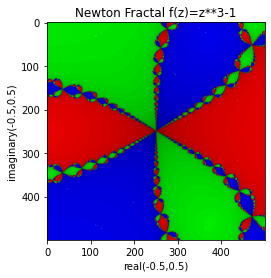

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


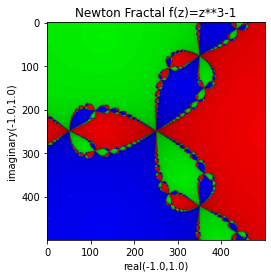

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


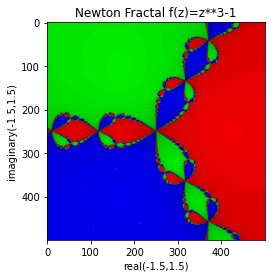

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


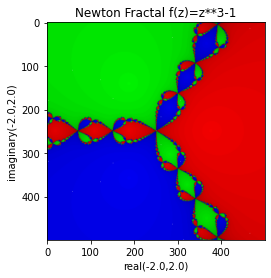

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


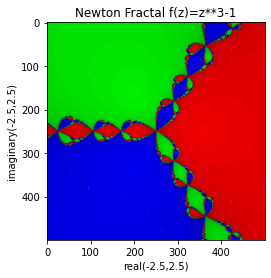

In [2]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


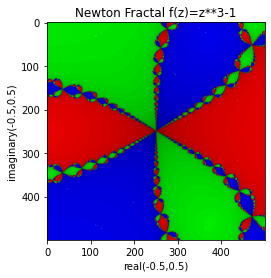

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


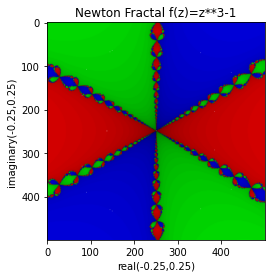

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


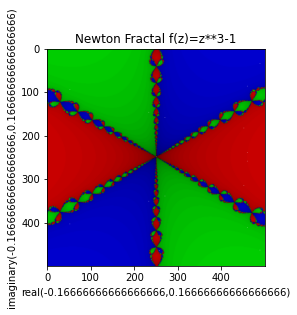

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


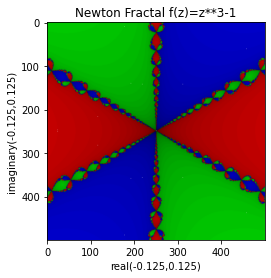

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


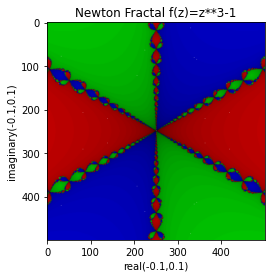

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


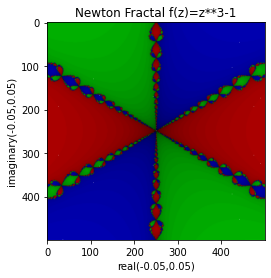

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


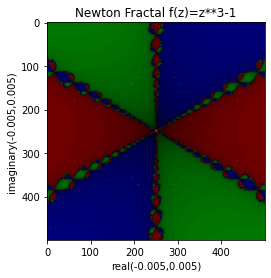

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


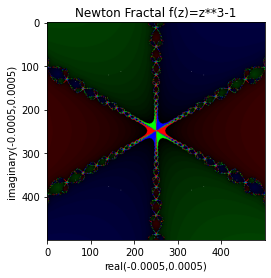

In [3]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

## Plot of f(z)= z\*\*3 - 2\*\*z +2

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


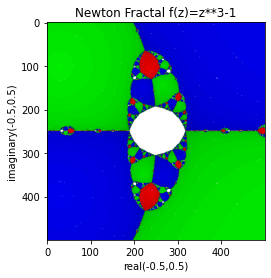

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


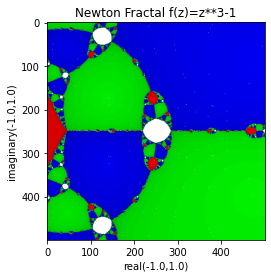

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


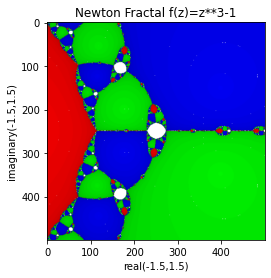

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


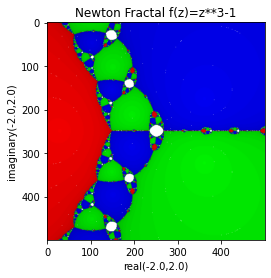

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


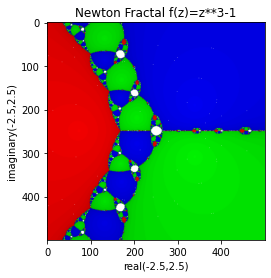

In [4]:
print("zoom out")
display1(zoom=1, function_idx=1)
display1(zoom=2, function_idx=1)
display1(zoom=3, function_idx=1)
display1(zoom=4, function_idx=1)
display1(zoom=5, function_idx=1)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


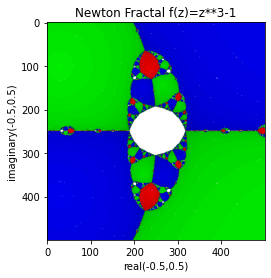

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


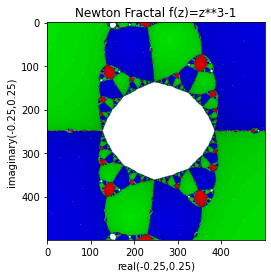

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


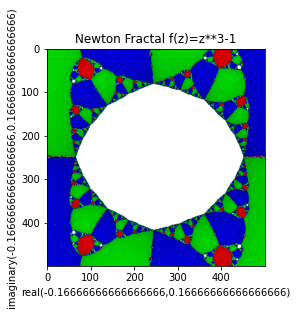

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


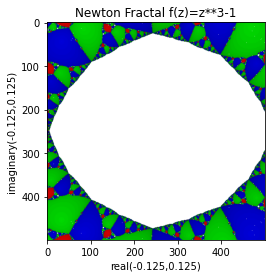

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


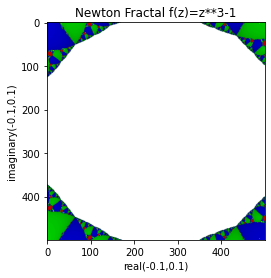

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


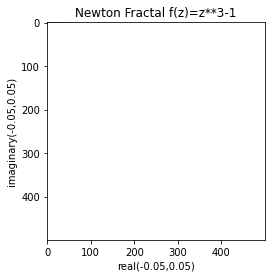

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


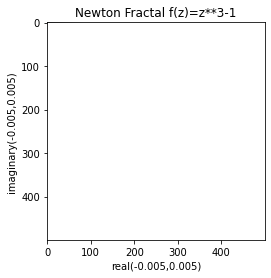

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


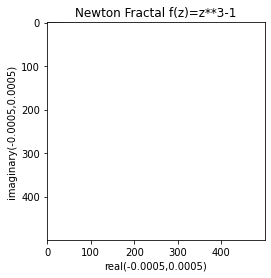

In [5]:
print("zoom in")
display1(zoom=1, function_idx=1)
display1(zoom=1/2, function_idx=1)
display1(zoom=1/3, function_idx=1)
display1(zoom=1/4, function_idx=1)
display1(zoom=1/5, function_idx=1)
display1(zoom=1/10, function_idx=1)
display1(zoom=1/100, function_idx=1)
display1(zoom=1/1000, function_idx=1)

## Plot of f(z)= z\*\*8 + 15*(z\*\*4) -16

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


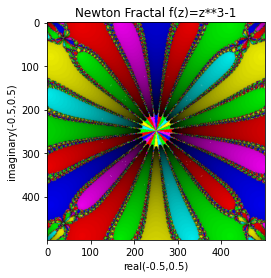

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


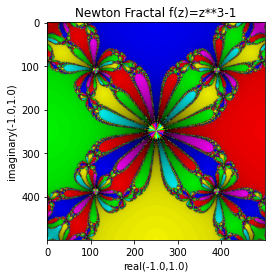

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


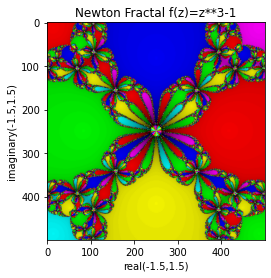

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


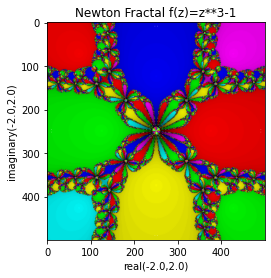

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


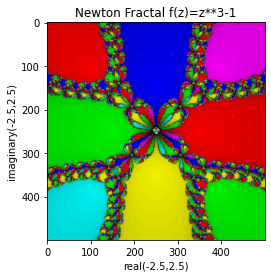

In [6]:
print("zoom out")
display1(zoom=1, function_idx=2)
display1(zoom=2, function_idx=2)
display1(zoom=3, function_idx=2)
display1(zoom=4, function_idx=2)
display1(zoom=5, function_idx=2)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


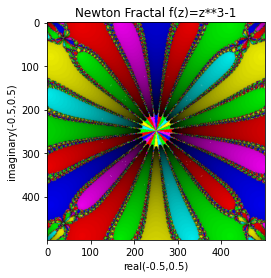

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


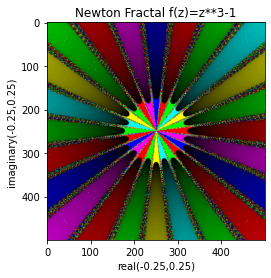

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


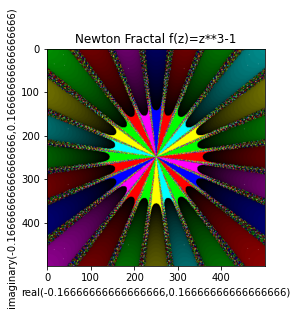

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


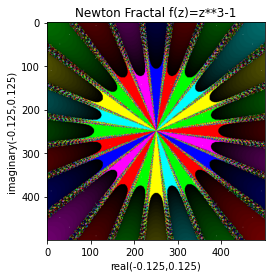

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


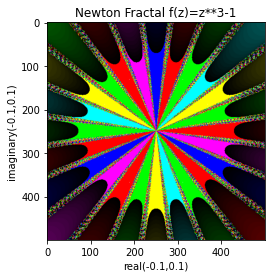

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


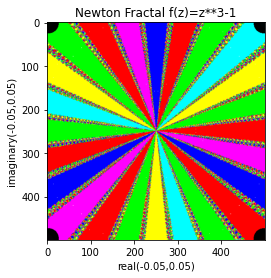

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


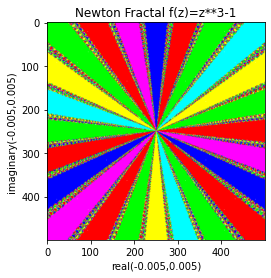

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


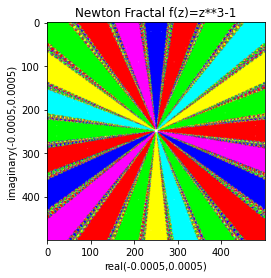

In [7]:
print("zoom in")
display1(zoom=1, function_idx=2)
display1(zoom=1/2, function_idx=2)
display1(zoom=1/3, function_idx=2)
display1(zoom=1/4, function_idx=2)
display1(zoom=1/5, function_idx=2)
display1(zoom=1/10, function_idx=2)
display1(zoom=1/100, function_idx=2)
display1(zoom=1/1000, function_idx=2)

## Plot of f(z)= z\*\*6 + z\*\*3 - 1

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


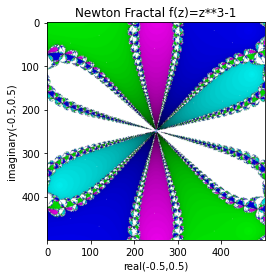

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


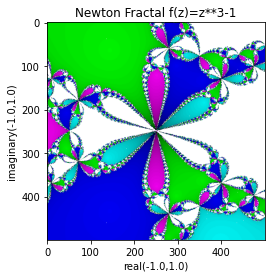

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


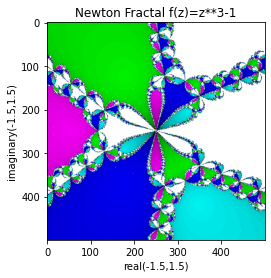

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


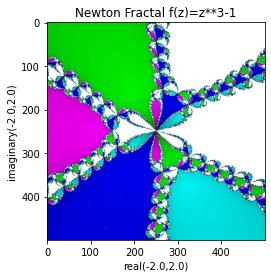

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


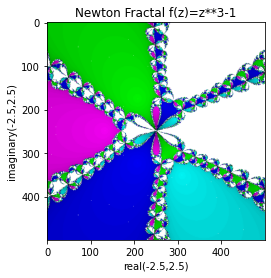

In [11]:
print("zoom out")
display1(zoom=1, function_idx=4)
display1(zoom=2, function_idx=4)
display1(zoom=3, function_idx=4)
display1(zoom=4, function_idx=4)
display1(zoom=5, function_idx=4)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


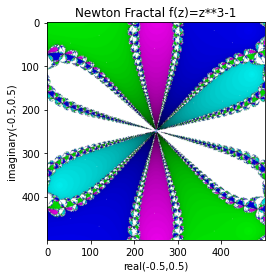

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


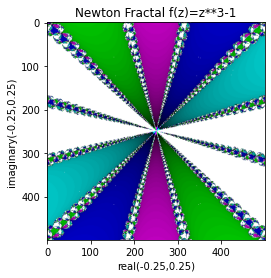

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


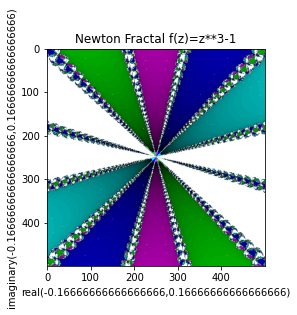

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


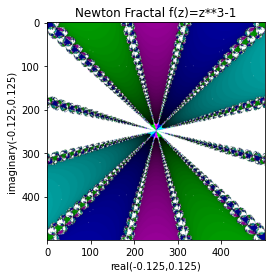

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


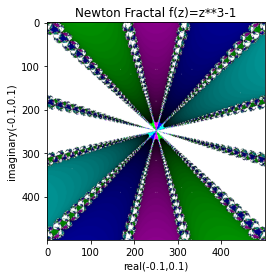

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


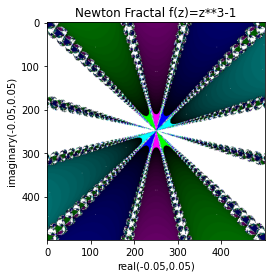

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


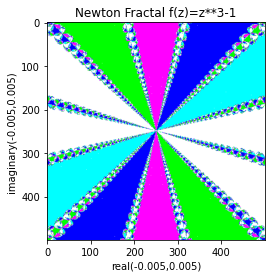

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


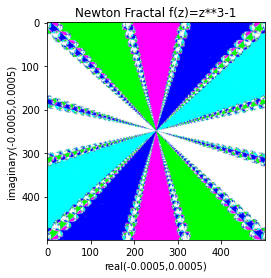

In [12]:
print("zoom in")
display1(zoom=1, function_idx=4)
display1(zoom=1/2, function_idx=4)
display1(zoom=1/3, function_idx=4)
display1(zoom=1/4, function_idx=4)
display1(zoom=1/5, function_idx=4)
display1(zoom=1/10, function_idx=4)
display1(zoom=1/100, function_idx=4)
display1(zoom=1/1000, function_idx=4)